In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#normalization of data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
#Load data 
df=pd.read_csv("D:\\Excel_project\\Walmart Data Analysis and Forcasting.csv")
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [5]:
# Display the shape of the DataFrame
print(f'Shape of the DataFrame: {df.shape}')


Shape of the DataFrame: (6435, 8)


In [6]:
# Info about data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [7]:
# Display top 5 rows
print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [8]:
# Check for null values
print('Null values in each column:')
print(df.isnull().sum())


Null values in each column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [9]:
# Check for duplicates
print(f'Total duplicates: {df.duplicated().sum()}')


Total duplicates: 0


In [10]:
# Descriptive statistics
print('Descriptive Statistics:')
print(df.describe(include='all'))


Descriptive Statistics:
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.0

In [11]:
# Unique Stores and Weeks
print('Total Unique Stores:', df['Store'].nunique())
print('Total No of Weeks:', df['Date'].nunique())


Total Unique Stores: 45
Total No of Weeks: 143


In [13]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# Extract Month and Year
df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.year


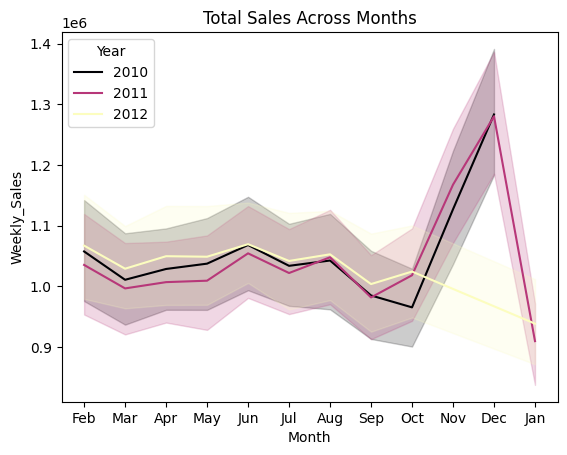

In [15]:
#EDA
# Total Sales Across Months
sns.lineplot(x='Month', y='Weekly_Sales', data=df, hue='Year', palette='magma')
plt.title("Total Sales Across Months")
plt.show()

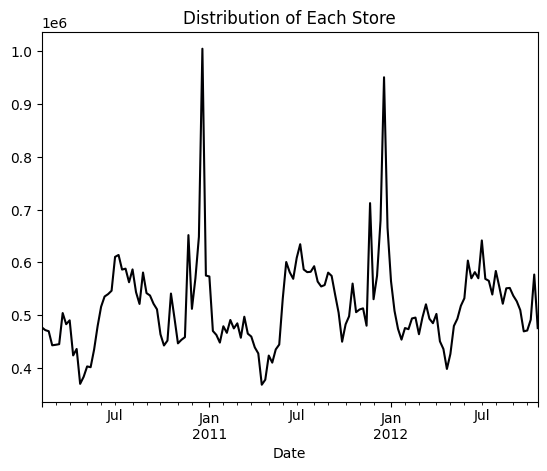

In [17]:
# Distribution of Each Store
sales_pivot = df.pivot(index='Date', columns='Store', values='Weekly_Sales')
sales_pivot[16].plot(kind='line', cmap='magma')
plt.title('Distribution of Each Store')
plt.show()

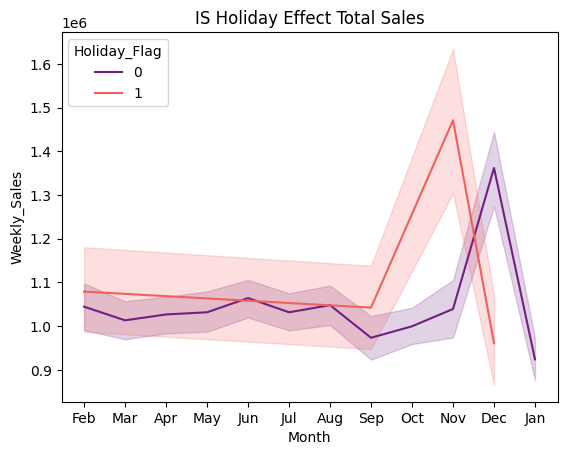

In [18]:
# IS Holiday Effect Total Sales
sns.lineplot(x='Month', y='Weekly_Sales', data=df, palette='magma', hue='Holiday_Flag')
plt.title("IS Holiday Effect Total Sales")
plt.show()

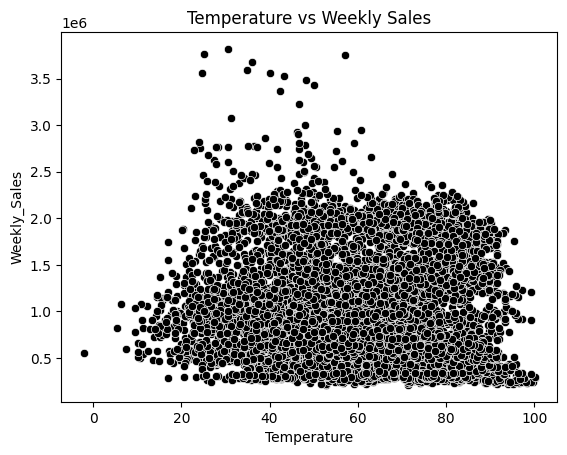

In [19]:
# Temperature vs Weekly Sales
sns.scatterplot(y="Weekly_Sales", x='Temperature', data=df, color='black')
plt.title("Temperature vs Weekly Sales")
plt.show()

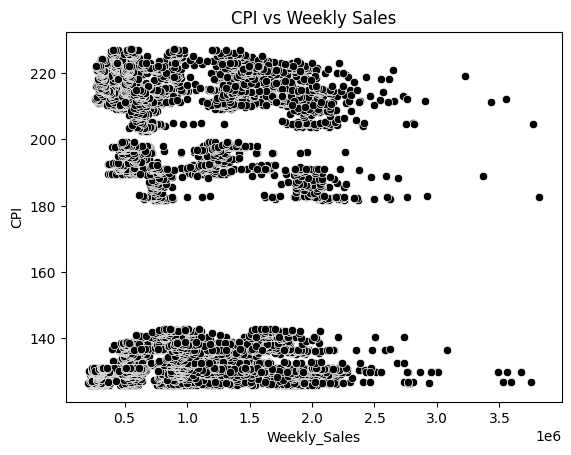

In [20]:
# CPI vs Weekly Sales
sns.scatterplot(y='CPI', x='Weekly_Sales', data=df, color='black')
plt.title("CPI vs Weekly Sales")
plt.show()

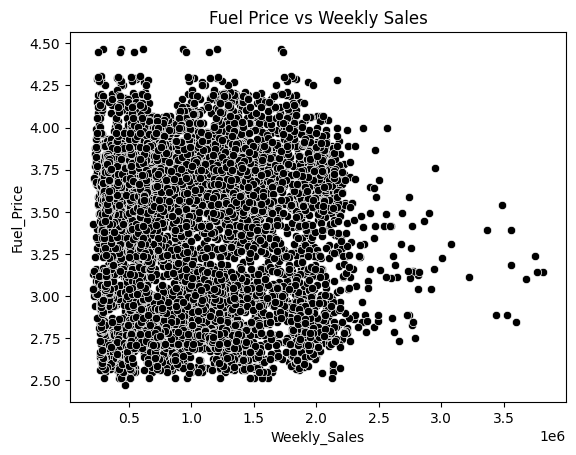

In [21]:
# Fuel Price vs Weekly Sales
sns.scatterplot(y='Fuel_Price', x='Weekly_Sales', data=df, color='black')
plt.title("Fuel Price vs Weekly Sales")
plt.show()

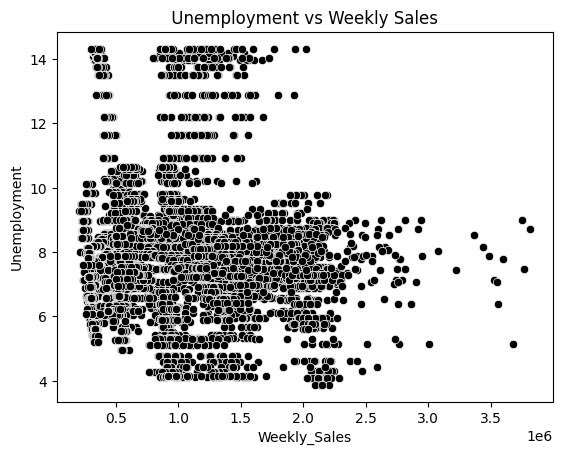

In [22]:
'''
     Unemployment vs Weakly Sales
'''
sns.scatterplot(y='Unemployment',x='Weekly_Sales',data=df,color='black')
plt.title(" Unemployment vs Weekly Sales ")
plt.show()

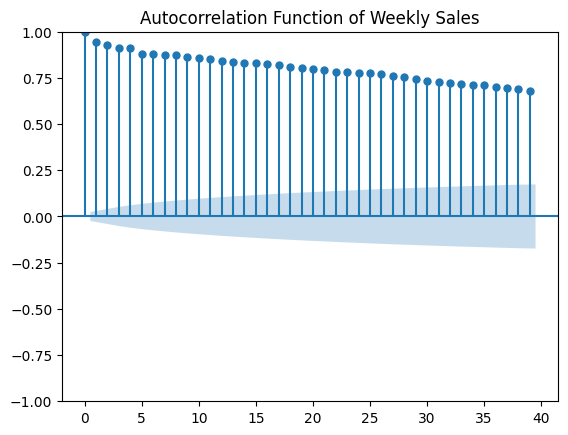

In [30]:
#Statatical analysis
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Weekly_Sales'])
plt.title("Autocorrelation Function of Weekly Sales")
plt.show()

In [32]:
# Stationarity Check: ADF Test
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.624149498578303
p-value: 0.0001165586969990124
Critical Values: {'1%': -3.4313721757424656, '5%': -2.8619917128968813, '10%': -2.5670104435791017}


In [34]:
# Time Series Forecasting using ARIMA
model = ARIMA(df['Weekly_Sales'], order=(5, 1, 0))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6435
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -86374.457
Date:                Tue, 01 Oct 2024   AIC                         172760.914
Time:                        16:22:04   BIC                         172801.530
Sample:                             0   HQIC                        172774.969
                               - 6435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3568      0.006    -61.474      0.000      -0.368      -0.345
ar.L2         -0.2148      0.007    -30.361      0.000      -0.229      -0.201
ar.L3         -0.1943      0.008    -25.386      0.0

In [24]:
'''
Stationary Test:-
When the test statistic is lower than the critical value shown,
you reject the null hypothesis and infer that the time series is stationary.
'''

result = adfuller(df['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.624149498578303
p-value: 0.0001165586969990124
Critial Values:
   1%, -3.4313721757424656
Critial Values:
   5%, -2.8619917128968813
Critial Values:
   10%, -2.5670104435791017


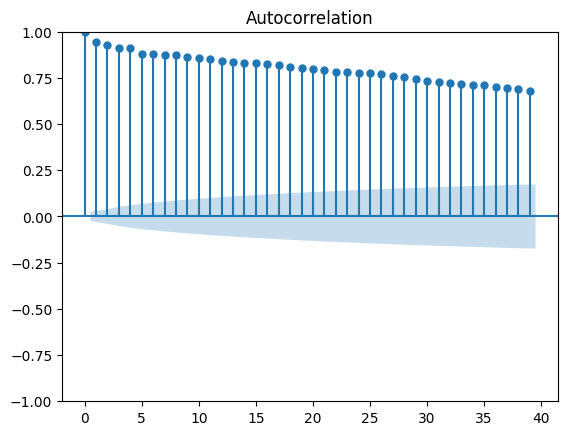

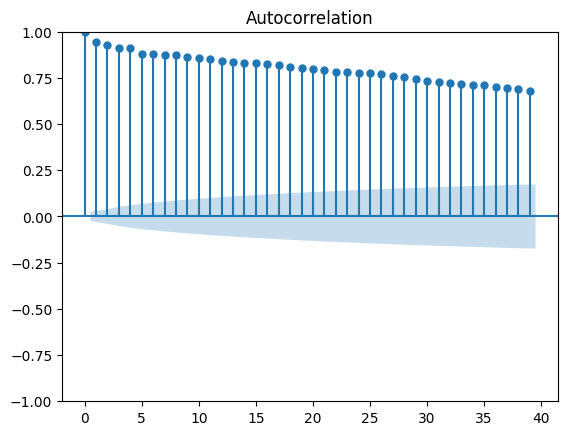

In [25]:
#Assuming 'df' is the time series data
plot_acf(df['Weekly_Sales'])
plot_acf(df['Weekly_Sales'])
plt.show()

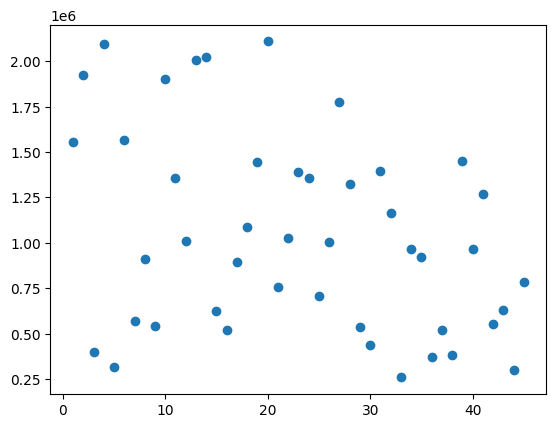

In [26]:
#Cluster Anlaysis 
store_data=df.groupby('Store').agg({'Weekly_Sales':'mean'}).reset_index()
plt.scatter(store_data['Store'],store_data['Weekly_Sales']
            )

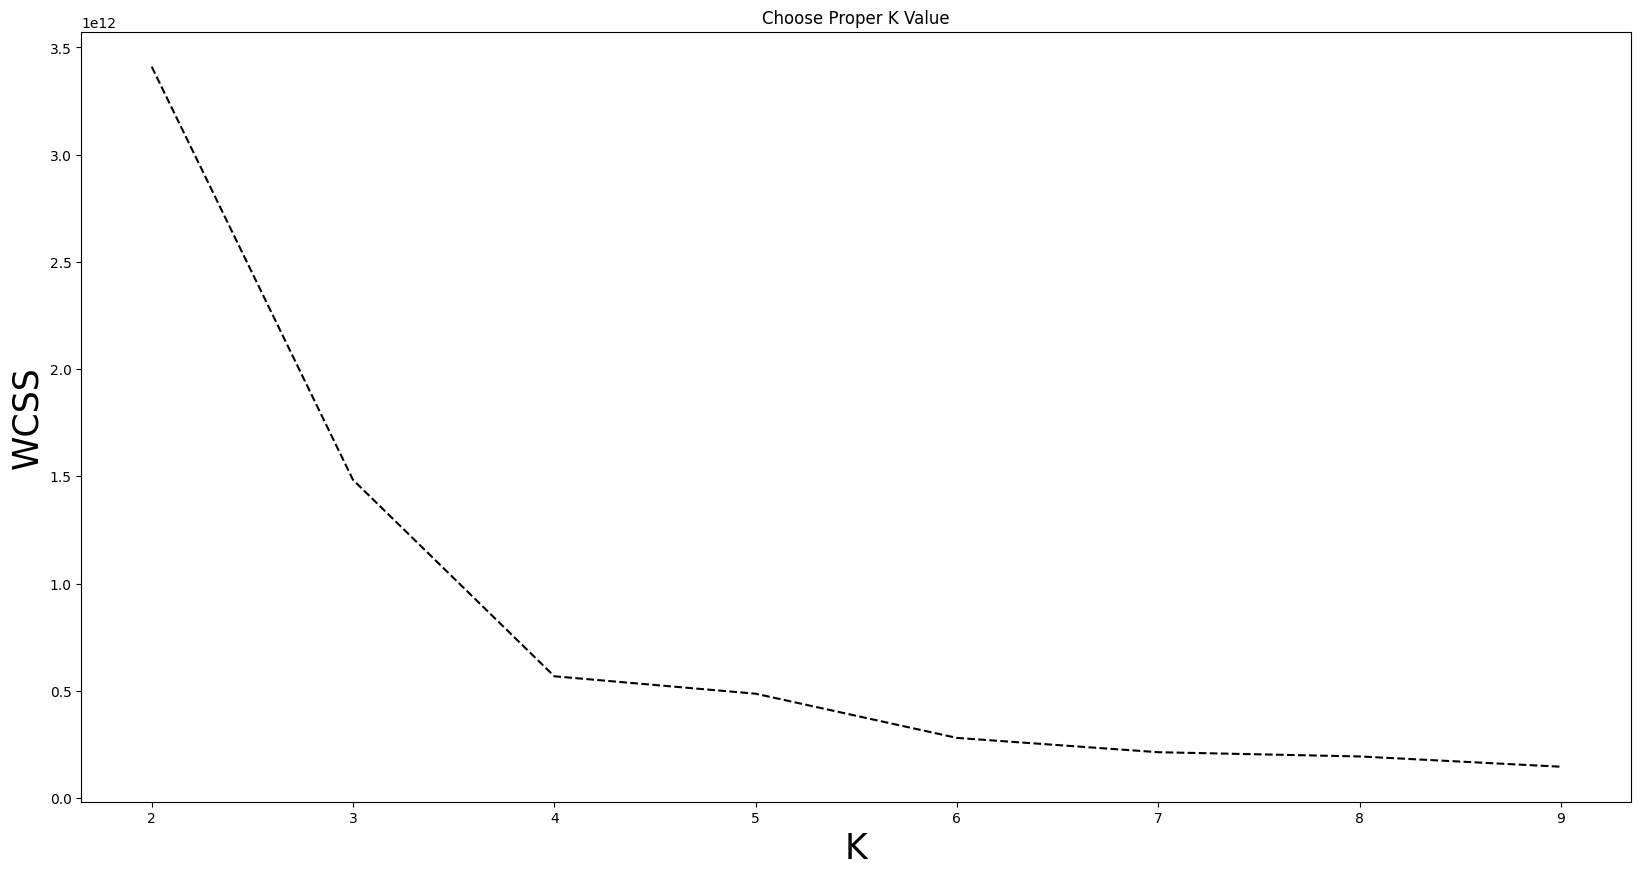

In [27]:
from sklearn.cluster import KMeans
X = store_data[['Weekly_Sales']]
wcss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=100)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20,10))
plt.plot(list(range(2,10)),wcss,color='black',linestyle='--')
plt.xlabel('K',fontsize = 25)
plt.ylabel('WCSS',fontsize = 25)
plt.title("Choose Proper K Value")
plt.show()

In [28]:
model=KMeans(n_clusters=3,init='k-means++',max_iter=100)
model.fit(X)
y_kmeans=model.fit_predict(X)

from sklearn.metrics import silhouette_score
silhouette_score( X,y_kmeans)

0.6147007510833369

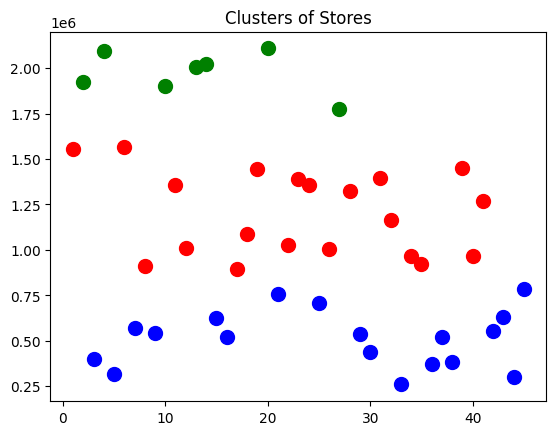

In [29]:
X=np.array(X)
store_data=np.array(store_data)
plt.scatter(store_data[y_kmeans==0, 0],X[y_kmeans==0, 0], s=100, c='red', label ='Cluster 1')
plt.scatter(store_data[y_kmeans==1, 0],X[y_kmeans==1, 0] , s=100, c='blue', label ='Cluster 2')
plt.scatter(store_data[y_kmeans==2, 0],X[y_kmeans==2, 0] , s=100, c='green', label ='Cluster 3')


plt.title('Clusters of Stores')
plt.show()
